### Parkinson's Diagnosis

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [337]:
data = pd.read_csv("../../Classes/DSHD/Project/parkinsons.data")
targets = data['status']

In [338]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


#### MDVP:Fo(Hz) - Average vocal fundamental frequency 

In [339]:
actual_hi_lo_vocal_fundamental_freq = data.iloc[:,2:4]
actual_average_vocal_fundamental_freq = actual_hi_lo_vocal_fundamental_freq.mean(axis = 1)
error_in_measurement = data.iloc[:,1] - actual_average_vocal_fundamental_freq
data["Error.MDVP.Fo (Hz)"] = error_in_measurement

In [340]:
#data = data.drop(['MDVP:Fhi(Hz)','MDVP:Flo(Hz)'],axis = 1)

In [341]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE', 'Error.MDVP.Fo (Hz)'],
      dtype='object')

## Vocal Jitters

Frequency of a speakers voice will vary from one cycle to the next
The random period variability= frequency perturbation or vocal jitter
Vocal jitter increases in voice disorder & is responsible for hoarse, harsh or rough voice quality
Jitter is a measurement of vocal stability
Normal voices are usually less than 1% frequency variability

Despite these complications, some authorities do declare so-called thresholds of pathology. For example, the Multi-Dimensional Voice Program (MDVP) (Kay Elemetrics, 2008) indicates a threshold of pathology of <=1.040% for jitter and <=3.810% for shimmer (their parameters Jitt and Shim respectively). Clearly, any percentage score above these threshold figures is considered to be a sign of potential pathology. [I am using the term pathology here in its weak sense, to mean simply a departure or deviation from expected typical functioning – and not to indicate any particular organic pathology.] Now, as indicated above, there are many ways of calculating jitter and shimmer – each using a different formula. In fact, the Praat software (Boersma and Weenink, 2009) can calculate five different measures of jitter and six different measures of shimmer.`

http://www.fon.hum.uva.nl/praat/
http://www.sltinfo.com/acoustic-measures-norms/

In [342]:
data.loc[:,['Jitter:DDP','MDVP:RAP']].head()

,Jitter:DDP,MDVP:RAP
0,0.01109,0.00370
1,0.01394,0.00465
2,0.01633,0.00544
3,0.01505,0.00502
4,0.01966,0.00655


In [343]:
compare_rap_ddp = 3*data.loc[:,'MDVP:RAP']
compare_rap_ddp.head()

0    0.01110
1    0.01395
2    0.01632
3    0.01506
4    0.01965
Name: MDVP:RAP, dtype: float64

As you can see from the above results the Jitter:DDP is three times the MDVP:RAP

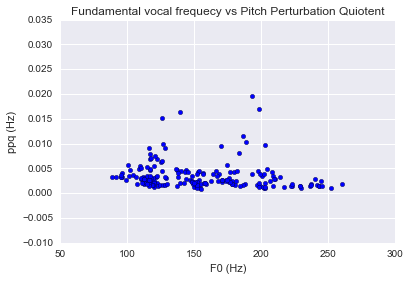

In [344]:
# correlation between PPQ and F0
x = data['MDVP:Fo(Hz)']
y = data['MDVP:PPQ']
plt.title("Fundamental vocal frequecy vs Pitch Perturbation Quiotent")
plt.xlabel("F0 (Hz)")
plt.ylabel("ppq (Hz)")
plt.scatter(x,y)
plt.show()

In [345]:
x.corr(y)

-0.11216542705872048

In [346]:
with_parkinsons = data[data['status'] == 1]
without_parkinsons = data[data['status'] == 0]

In [347]:
with_parkinsons.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,Error.MDVP.Fo (Hz)
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,3.8425
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,-8.8345
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,-4.6510
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,-7.9425
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,-10.2040


In [348]:
without_parkinsons.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,Error.MDVP.Fo (Hz)
30,phon_R01_S07_1,197.076,206.896,192.055,0.00289,0.000010,0.00166,0.00168,0.00498,0.01098,...,0.00339,26.775,0,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569,-2.3995
31,phon_R01_S07_2,199.228,209.512,192.091,0.00241,0.000010,0.00134,0.00138,0.00402,0.01015,...,0.00167,30.940,0,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501,-1.5735
32,phon_R01_S07_3,198.383,215.203,193.104,0.00212,0.000010,0.00113,0.00135,0.00339,0.01263,...,0.00119,30.775,0,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320,-5.7705
33,phon_R01_S07_4,202.266,211.604,197.079,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,...,0.00072,32.684,0,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141,-2.0755
34,phon_R01_S07_5,203.184,211.526,196.160,0.00178,0.000009,0.00094,0.00106,0.00283,0.00958,...,0.00065,33.047,0,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539,-0.6590


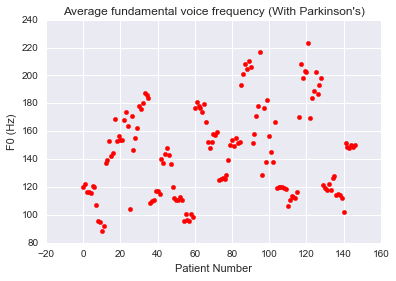

In [349]:
plt.title("Average fundamental voice frequency (With Parkinson's)")
plt.xlabel("Patient Number")
plt.ylabel("F0 (Hz)")
plt.scatter(range(with_parkinsons.loc[:,'MDVP:Fo(Hz)'].shape[0]),with_parkinsons.loc[:,'MDVP:Fo(Hz)'],color = 'red')

1.040 % is the pathology threshold for Fo (Hz)

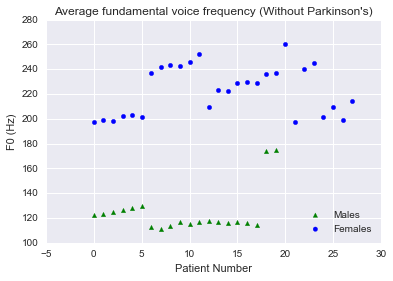

In [350]:
plt.title("Average fundamental voice frequency (Without Parkinson's)")
plt.xlabel("Patient Number")
plt.ylabel("F0 (Hz)")
plt.scatter(range(without_parkinsons.loc[without_parkinsons['MDVP:Fo(Hz)'] < 180,'MDVP:Fo(Hz)'].shape[0]),without_parkinsons.loc[without_parkinsons['MDVP:Fo(Hz)'] < 180,'MDVP:Fo(Hz)'],color = 'green',label = 'Males',marker = "^")
plt.scatter(range(without_parkinsons.loc[without_parkinsons['MDVP:Fo(Hz)'] > 180,'MDVP:Fo(Hz)'].shape[0]),without_parkinsons.loc[without_parkinsons['MDVP:Fo(Hz)'] > 180,'MDVP:Fo(Hz)'],color = 'blue',label = "Females",marker = "o")
plt.legend(loc = 'lower right')

The average fundametal frequency of patients without parkinsons was lower than the people with parkinson's that means that the voice is really affected during parkinson's disease.

In [351]:
with_parkinsons.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,Error.MDVP.Fo (Hz)
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,...,147.000000,147.000000,147.0,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.029211,20.974048,1.0,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828,-2.486748
std,32.348050,88.339180,32.274358,0.005240,0.000037,0.003241,0.002998,0.009724,0.019970,0.207798,...,0.044447,4.339143,0.0,0.101254,0.054786,0.970792,0.077809,0.375742,0.084271,40.438943
min,88.333000,102.145000,65.476000,0.001680,0.000010,0.000680,0.000920,0.002040,0.010220,0.090000,...,0.002310,8.441000,1.0,0.263654,0.574282,-7.120925,0.063412,1.765957,0.093193,-235.757000
25%,117.572000,133.776500,80.875500,0.004005,0.000030,0.002030,0.002190,0.006085,0.018295,0.168000,...,0.008445,18.782000,1.0,0.439064,0.685569,-6.038300,0.199507,2.180933,0.170103,-5.458250
50%,145.174000,163.335000,99.770000,0.005440,0.000040,0.002840,0.003140,0.008530,0.028380,0.263000,...,0.016580,21.414000,1.0,0.530529,0.726652,-5.440040,0.240875,2.439597,0.222716,0.149000
75%,170.071000,207.160500,129.240000,0.007670,0.000060,0.004100,0.004360,0.012300,0.042525,0.394500,...,0.027960,24.164500,1.0,0.604573,0.764868,-4.664067,0.303660,2.668479,0.274397,12.188750
max,223.361000,588.518000,199.020000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.314820,29.928000,1.0,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367,53.386500


In [352]:
without_parkinsons.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,Error.MDVP.Fo (Hz)
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.00000,48.0,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.011483,24.67875,0.0,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017,-2.484250
std,52.731067,96.727067,58.757070,0.002055,0.000015,0.001066,0.000943,0.003199,0.005544,0.057822,...,0.019088,3.43454,0.0,0.092199,0.051346,0.642782,0.062982,0.310269,0.044820,50.780313
min,110.739000,113.597000,74.287000,0.001780,0.000007,0.000920,0.001060,0.002760,0.009540,0.085000,...,0.000650,17.88300,0.0,0.256570,0.626710,-7.964984,0.006274,1.423287,0.044539,-222.573000
25%,120.947500,139.413250,98.243750,0.002655,0.000010,0.001332,0.001480,0.003998,0.014475,0.129000,...,0.004188,22.99325,0.0,0.372126,0.654291,-7.257665,0.120623,1.974217,0.094658,-2.156500
50%,198.996000,231.161500,113.938500,0.003355,0.000025,0.001625,0.001775,0.004875,0.016705,0.154000,...,0.004825,24.99700,0.0,0.435368,0.682527,-6.826448,0.167356,2.129510,0.115119,0.673500
75%,229.077000,251.239250,199.183000,0.004530,0.000030,0.001907,0.002228,0.005725,0.020210,0.189250,...,0.009213,26.13925,0.0,0.507748,0.742284,-6.350146,0.193766,2.339487,0.147761,9.637625
max,260.105000,592.030000,239.170000,0.013600,0.000080,0.006240,0.005640,0.018730,0.040870,0.405000,...,0.107150,33.04700,0.0,0.663842,0.785714,-5.198864,0.291954,2.882450,0.252404,62.800000


#### Checking for Pathology using Shimmer 

In [353]:
shimmers = ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA']
shimmer_data = data[shimmers]
shimmer_data.head()

,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA
0,0.04374,0.426,0.02182,0.03130,0.02971,0.06545
1,0.06134,0.626,0.03134,0.04518,0.04368,0.09403
2,0.05233,0.482,0.02757,0.03858,0.03590,0.08270
3,0.05492,0.517,0.02924,0.04005,0.03772,0.08771
4,0.06425,0.584,0.03490,0.04825,0.04465,0.10470


In [354]:
shimmer_data.corr().round(3)

,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA
MDVP:Shimmer,1.000,0.987,0.988,0.983,0.950,0.988
MDVP:Shimmer(dB),0.987,1.000,0.963,0.974,0.961,0.963
Shimmer:APQ3,0.988,0.963,1.000,0.960,0.897,1.000
Shimmer:APQ5,0.983,0.974,0.960,1.000,0.949,0.960
MDVP:APQ,0.950,0.961,0.897,0.949,1.000,0.897
Shimmer:DDA,0.988,0.963,1.000,0.960,0.897,1.000


There is a very high correlation between these shimmer values and the most interesting one is between Shimmer:DDA and Shimmer:APQ3 which is 1.0.

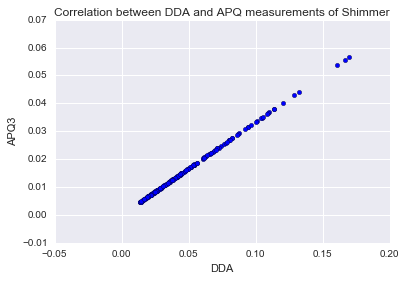

In [355]:
plt.scatter(shimmer_data["Shimmer:DDA"],shimmer_data["Shimmer:APQ3"])
plt.title("Correlation between DDA and APQ measurements of Shimmer")
plt.xlabel("DDA")
plt.ylabel("APQ3")
plt.show()

Since all the shimmer variables are correlated we need to remove them while training the model.

Only keep MDVP:Shimmer, its highly correlated with others

In [356]:
NH = data[["NHR","HNR"]]

To find male and female in the dataset.

In [357]:
male_condition = without_parkinsons['MDVP:Fo(Hz)'] < 180
data.loc[male_condition.values,'name']

12    phon_R01_S04_1
13    phon_R01_S04_2
14    phon_R01_S04_3
15    phon_R01_S04_4
16    phon_R01_S04_5
17    phon_R01_S04_6
30    phon_R01_S07_1
31    phon_R01_S07_2
32    phon_R01_S07_3
33    phon_R01_S07_4
34    phon_R01_S07_5
35    phon_R01_S07_6
36    phon_R01_S08_1
37    phon_R01_S08_2
38    phon_R01_S08_3
39    phon_R01_S08_4
40    phon_R01_S08_5
41    phon_R01_S08_6
43    phon_R01_S10_2
45    phon_R01_S10_4
Name: name, dtype: object

The above results show that There are four patients in the dataset who don't have parkinsons are male and remaining are females. So patient number 4,7,8,10 are males for sure.

We claimed this because the fundamental frequency of males lies between 85 Hz to 180 Hz.

In [358]:
with_parkinsons.loc[:,['NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']].head()

,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [359]:
without_parkinsons.loc[:,['NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']].head()

,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
30,0.00339,26.775,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569
31,0.00167,30.940,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501
32,0.00119,30.775,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
33,0.00072,32.684,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
34,0.00065,33.047,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539


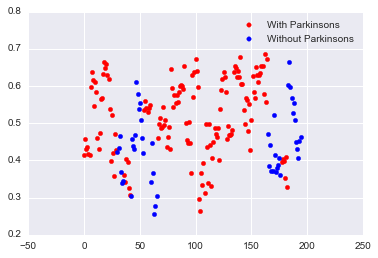

In [360]:
plt.scatter(with_parkinsons.index,with_parkinsons['RPDE'],color='red',label = 'With Parkinsons')
plt.scatter(without_parkinsons.index,without_parkinsons['RPDE'],color = 'blue', label = 'Without Parkinsons')
plt.legend()

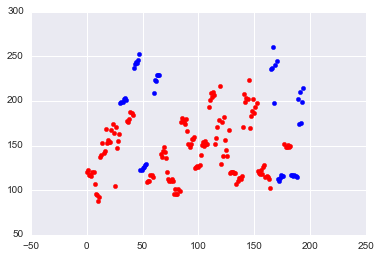

In [361]:
plt.scatter(with_parkinsons.index, with_parkinsons['MDVP:Fo(Hz)'],color = 'red')
plt.scatter(without_parkinsons.index,without_parkinsons['MDVP:Fo(Hz)'],color = 'blue')

In [362]:
from sklearn.preprocessing import StandardScaler
train_var = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE', 'Error.MDVP.Fo (Hz)']


data = data.sample(frac=1)
X,y = data[train_var],data['status']
sc = StandardScaler()
sc.fit(X)
sc.fit_transform(X)

X_train,y_train = X[:90], y[:90]
X_test, y_test = X[90:],y[90:]

In [363]:
from sklearn.linear_model import LogisticRegression
lr_lasso = LogisticRegression(penalty = 'l1',C=0.45,solver='liblinear')
lr_lasso.fit(X_train, y_train)
y_pred = lr_lasso.predict(X_test)

In [364]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[13, 14],
       [ 0, 78]])

In [365]:
from sklearn.metrics import precision_recall_fscore_support

In [372]:
precision, recall, fscore = precision_recall_fscore_support(y_test, y_pred,average='weighted')[:3]

In [373]:
print("Precision = ",precision)
print("Recall = ",recall)
print("Fscore = ", fscore)

Precision =  0.886956521739
Recall =  0.866666666667
Fscore =  0.848823529412
